In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
def to_frames(x,frame_size=256,overlap=0):
    shift = frame_size-overlap
    n_frames = (x.shape[0]-frame_size)//shift+1
    return np.array([x[shift*l: shift*l+frame_size] for l in range(n_frames)])

In [3]:
def short_time_energy(x,frame_size=256) :
    return np.sum(np.square(to_frames(x,frame_size)),axis=-1)

def short_time_zero_crossing_rate(x,frame_size=1024,overlap=512):
    frames = to_frames(x,frame_size,overlap)
    frames = frames - frames.mean(axis=-1,keepdims=True) # normalized frames
    return np.sum(frames[:,:-1]*frames[:,1:]<=0,axis=-1)
    
def compute_pitch(x,frame_size=1024):
    return np.max(to_frames(x,frame_size),axis=-1)

In [4]:
s,s_rate = librosa.core.load("auds/sample1.wav")
print( "Number of sample points:",len(s)) 

Number of sample points: 865667


In [5]:
time = np.linspace(0, len(s) / s_rate,len(s))
energy = short_time_energy(s)
zcr = short_time_zero_crossing_rate(s)
time2 = np.linspace(0,len(s)/s_rate,len(zcr))
pitch = compute_pitch(s)

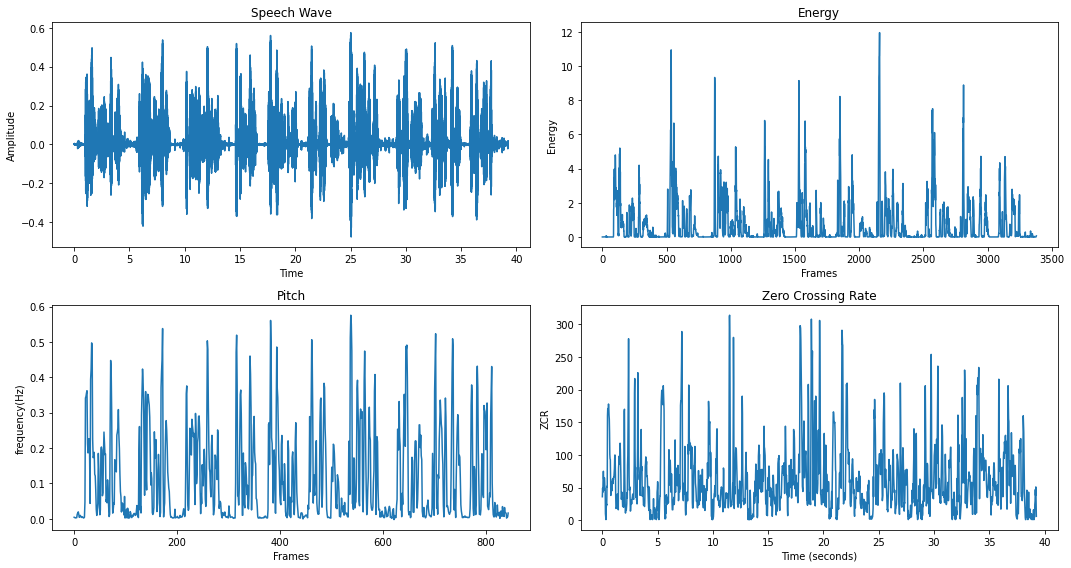

In [6]:
plt.figure(figsize=(15,8),tight_layout = True)

plt.subplot(2,2,1)
plt.plot(time, s)
plt.title("Speech Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,2,2)
plt.plot(energy)
plt.title('Energy')
plt.xlabel('Frames')
plt.ylabel('Energy')

plt.subplot(2,2,3)
plt.plot(pitch)
plt.title('Pitch')
plt.xlabel('Frames')
plt.ylabel('frequency(Hz)')

plt.subplot(2,2,4)
plt.plot(time2, zcr)
plt.title("Zero Crossing Rate")
plt.ylabel('ZCR')
plt.xlabel('Time (seconds)')

plt.show()